In [42]:
x,y = [], []
f = open("xqf131.tsp.txt", "r")
for l in f:
    row = l.split()
    x.append(row[1])
    y.append(row[2])

In [43]:
x = [int(el) for el in x]
y = [int(el) for el in y]

In [44]:
cities = []
for i in range(len(x)):
    cities.append([x[i], y[i]])

In [11]:
#for x in cities:
    #x[0] = int(x[0])
    #x[1] = int(x[1])

In [45]:
def distance(c1, c2):
    xDis = abs(c1[0] - c2[0])
    yDis = abs(c1[1] - c2[1])
    dist = np.sqrt((xDis ** 2) + (yDis ** 2))
    return dist

In [5]:
import numpy as np

In [46]:
distances = np.zeros((len(cities), len(cities)))
for i in range(len(cities)):
    for j in range(len(cities)):
        distances[i, j] = distance(cities[i], cities[j])

In [7]:
from deap import base, creator

In [47]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

C:\ProgramData\Anaconda3\lib\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [48]:
toolbox = base.Toolbox()

In [49]:
import random
toolbox.register("indices", random.sample, range(len(cities)), len(cities))

In [50]:
from deap import tools
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)

In [51]:
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [13]:
[individual[:10] for individual in toolbox.population(n = 5)]

[[26, 44, 71, 53, 115, 41, 121, 10, 125, 51],
 [1, 73, 48, 87, 54, 43, 111, 90, 18, 69],
 [16, 104, 26, 100, 29, 53, 114, 79, 46, 83],
 [123, 26, 31, 33, 74, 32, 56, 120, 25, 49],
 [91, 61, 84, 53, 4, 65, 88, 69, 22, 42]]

In [52]:
def EVALUATE(individual):
    summation = 0
    start = individual[0]
    for i in range(1, len(individual)):
        end = individual[i]
        summation += distances[start][end]
        start = end
    return summation

In [53]:
toolbox.register("evaluate", EVALUATE)

In [54]:
def MUTATE(individual, mutationRate):
    for swapped in range(len(individual)):
        if(random.random() < mutationRate):
            swapWith = int(random.random() * len(individual))
            city1 = individual[swapped]
            city2 = individual[swapWith]
            individual[swapped] = city2
            individual[swapWith] = city1
    return individual

In [63]:
toolbox.register("mate", tools.cxOrdered)
#toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.01)
toolbox.register("mutate", MUTATE, mutationRate = 0.01)
toolbox.register("select", tools.selTournament, tournsize=10)

In [62]:
POPULATION_SIZE = 200
N_ITERATIONS = 5000
N_MATINGS = 50

In [64]:
population = toolbox.population(n=POPULATION_SIZE)

In [65]:
fitnesses = [(individual, toolbox.evaluate(individual)) for individual in population]
for individual, fitness in fitnesses:
    individual.fitness.values = (fitness,)

In [29]:
from tqdm import tqdm

In [66]:
def offsprings(population):
    for _ in range(N_MATINGS):
        i1, i2 = np.random.choice(range(len(population)), size=2, replace=False)
        offspring1, offspring2 = toolbox.mate(population[i1], population[i2])           
        yield toolbox.mutate(offspring1)
        yield toolbox.mutate(offspring2)
for iteration in tqdm(list(range(1, N_ITERATIONS + 1))):
    current_population = list(map(toolbox.clone, population))
    offspring = list(offsprings(current_population))            
    for child in offspring:
        current_population.append(child)
    fitnesses = [(individual, toolbox.evaluate(individual)) for individual in current_population]
    for individual, fitness in fitnesses:
        individual.fitness.values = (fitness,)
    population[:] = toolbox.select(current_population, len(population))

100%|██████████████████████████████████████| 5000/5000 [10:20<00:00,  7.94it/s]


In [67]:
fitnesses = sorted([(i, toolbox.evaluate(individual)) for i, individual in enumerate(population)], key=lambda x: x[1])

fitnesses[:5]

[(0, 991.9796221754908),
 (1, 991.9796221754908),
 (2, 991.9796221754908),
 (3, 991.9796221754908),
 (4, 991.9796221754908)]

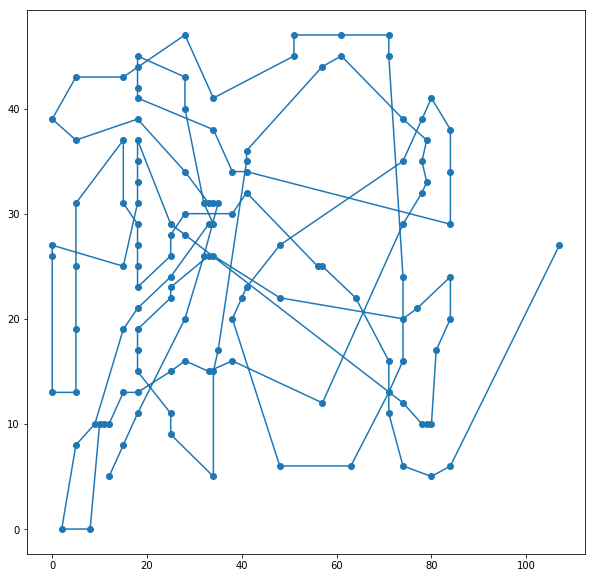

In [68]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(10,10))
plt.scatter(x, y)
from operator import itemgetter 
route_x = itemgetter(*population[0])(x)
route_y = itemgetter(*population[0])(y)
plt.plot(route_x, route_y)
plt.xlim = (0, 100)
plt.ylim = (0, 100)

In [115]:
distances

array([[  0.        ,  13.        ,  14.        , ...,  87.64131446,
         84.29116205, 107.91200119],
       [ 13.        ,   0.        ,   1.        , ...,  84.85281374,
         86.34813258, 107.0046728 ],
       [ 14.        ,   1.        ,   0.        , ...,  84.71717653,
         86.58521814, 107.        ],
       ...,
       [ 87.64131446,  84.85281374,  84.71717653, ...,   0.        ,
         32.        ,  25.49509757],
       [ 84.29116205,  86.34813258,  86.58521814, ...,  32.        ,
          0.        ,  31.144823  ],
       [107.91200119, 107.0046728 , 107.        , ...,  25.49509757,
         31.144823  ,   0.        ]])